In [262]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [263]:
data = pd.read_csv('inputs\Lionel Messi Goals.csv')
data.head(-10)

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,GoalType,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
...,...,...,...,...,...,...,...,...,...,...,...
636,mardi 22 septembre 2009,Liga,Racing Santander,Racing Santander,FC Barcelona,63,0,4,NaN,Left foot,Won
637,mardi 22 septembre 2009,Liga,Racing Santander,Racing Santander,FC Barcelona,24,0,2,NaN,Left foot,Won
638,samedi 25 avril 2009,Liga,Valencia,Valencia,FC Barcelona,24,0,1,NaN,Left foot,Draw
639,samedi 18 avril 2009,Liga,Getafe,Getafe,FC Barcelona,19,0,1,NaN,Left foot,Won


In [264]:
df = data['GoalType'].value_counts().reset_index()
df

,GoalType,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


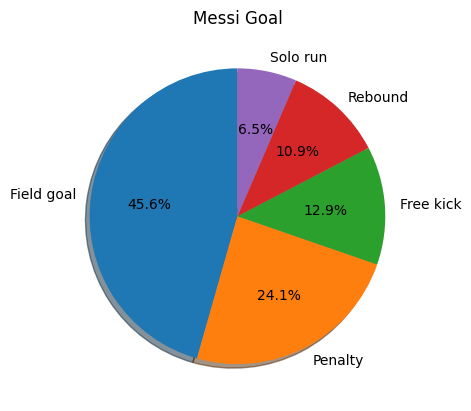

In [265]:
plt.pie(df['count'], labels=df['GoalType'], autopct= '%1.1f%%', shadow=True, startangle=90)
plt.title('Messi Goal')
plt.show()

In [266]:
df = data['Goal Method'].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


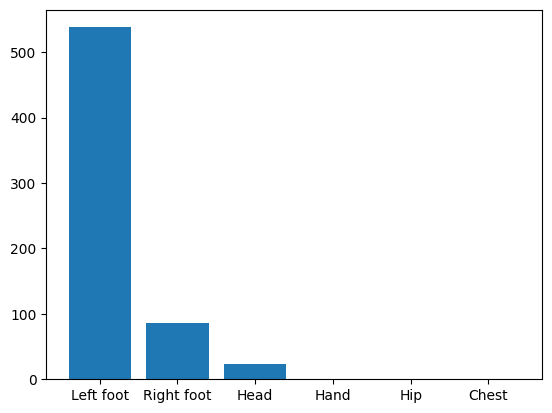

In [267]:
plt.bar(df['Goal Method'], df['count'])
plt.show()

In [268]:
data['Minute'] = data['Minute'].apply(eval)
data['Minute'] = data['Minute'].astype(int)

In [269]:
df = data['Minute'].value_counts().reset_index().sort_values(by=['Minute'], ascending=True)
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


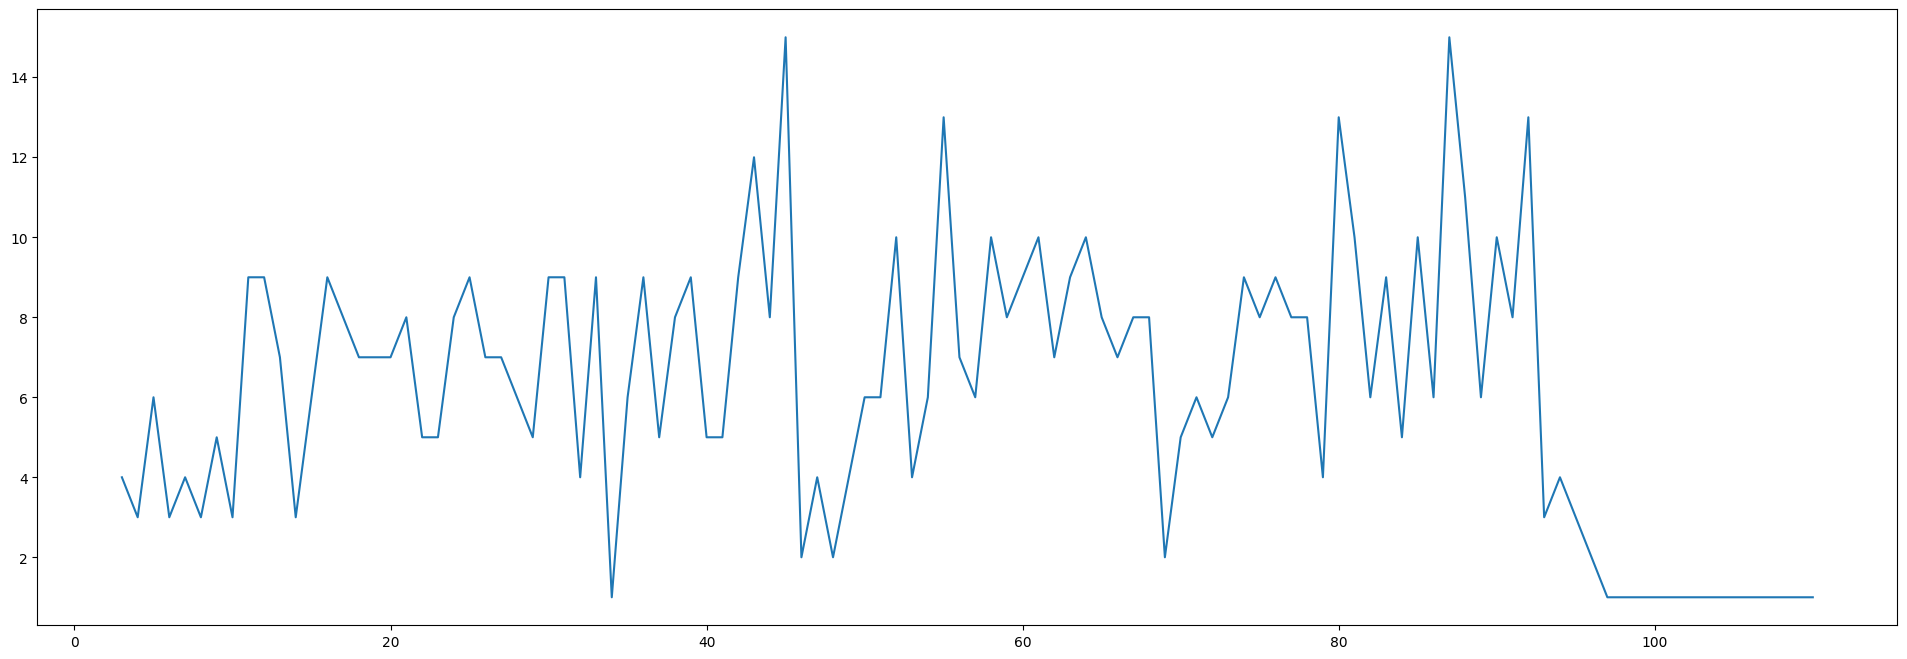

In [270]:
plt.figure(figsize=(24, 8))
plt.plot(df['Minute'], df['count'])
plt.show()

A. ستون تاریخ را پیش پردازش کنید و مقدار سال را بدست آورید. سپس تعداد گل های مسی در هر سال را بر روی نمودار نمایش دهید


In [271]:
def fix_date(x):
    date = x.split(' ')
    return date[3]

data['Date'] = data['Date'].apply(fix_date)

In [272]:
goals = data['Date'].value_counts().reset_index().sort_values(by=['Date'])
goals

,Date,count
14,2005,3
13,2006,12
10,2007,31
11,2008,22
9,2009,41
1,2010,60
3,2011,59
0,2012,91
8,2013,45
4,2014,58


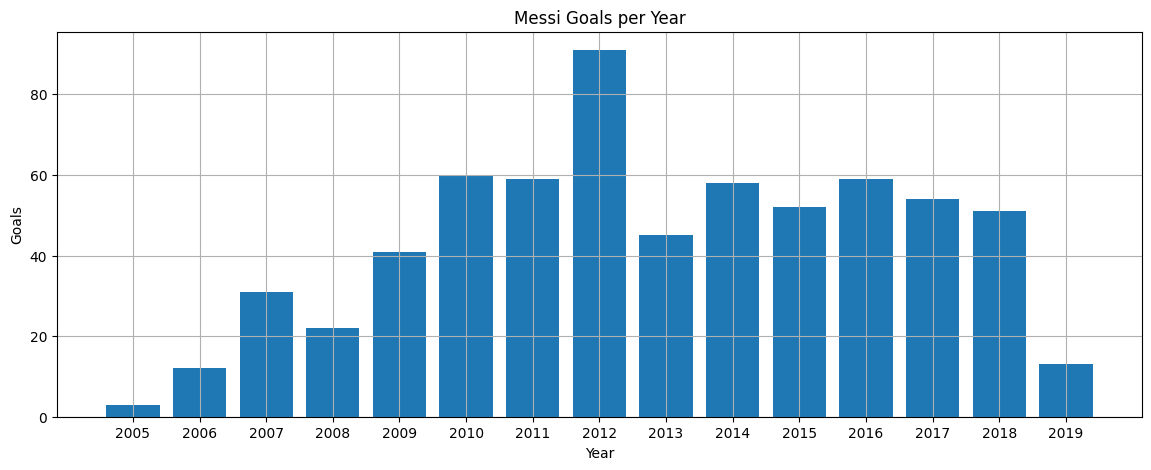

In [273]:
plt.figure(figsize=(14, 5))
plt.bar(goals['Date'], goals['count'])
plt.title('Messi Goals per Year')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.grid()
plt.show()

B. مسی اکثر پنالتی ها را با پای چپ زده است یا با پای راست؟ بر روی نمودار نمایش دهید

In [274]:
penalties = data.query("GoalType == 'Penalty'").reset_index(drop=True)

goal_methods = penalties['Goal Method'].value_counts().reset_index()
goal_methods.loc[len(goal_methods.index)] = ['Right foot', 0]
goal_methods

,Goal Method,count
0,Left foot,82
1,Right foot,0


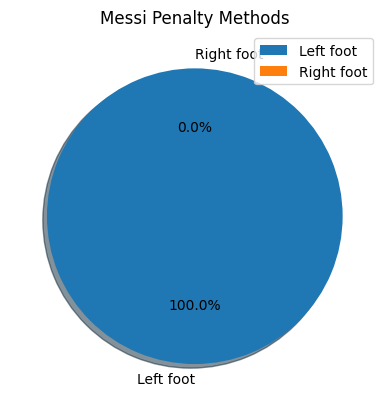

In [275]:
plt.pie(goal_methods['count'],labels=goal_methods['Goal Method'], autopct= '%1.1f%%', shadow=True, startangle=90)
plt.title('Messi Penalty Methods')
plt.legend()
plt.show()

C. چند درصد بازی هایی که در آن ها مسی در وقت اضافه گل زده است، به پیروزی ختم شده اند؟ بر روی نمودار نمایش دهید


In [276]:
extra_times = data.query("Minute > 90").reset_index(drop=True)

game_result = extra_times['Final Game Result'].value_counts().reset_index()
game_result

,Final Game Result,count
0,Won,27
1,Lost,2
2,Draw,1


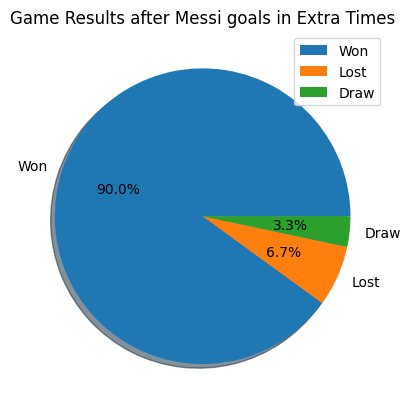

In [277]:
plt.pie(game_result['count'], labels=game_result['Final Game Result'], autopct= '%1.1f%%', shadow=True)
plt.title('Game Results after Messi goals in Extra Times')
plt.legend()
plt.show()

تمرین ستاره دار ⭐️

D. چند درصد گل های مسی گل تساوی بوده است؟

In [281]:
data['Result After Goal'] = np.where(data['Score Home Team - When Messi Scored'] == data['Score Away Team - When Messi Scored'], 'draw', 'undraw')

In [282]:
result_after_goal = data['Result After Goal'].value_counts().reset_index()
result_after_goal

,Result After Goal,count
0,undraw,595
1,draw,56


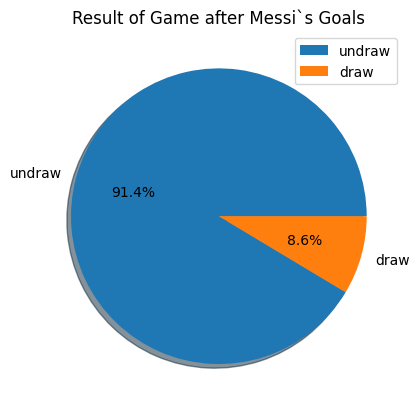

In [283]:
plt.pie(result_after_goal['count'], labels=result_after_goal['Result After Goal'], autopct= '%1.1f%%', shadow=True)
plt.title('Result of Game after Messi`s Goals')
plt.legend()
plt.show()